In [23]:
'''
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
'''

'\nimport numpy as np\nimport tensorflow as tf\nimport matplotlib.pyplot as plt\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nimport torch.nn.functional as F\nimport numpy as np\n'

In [24]:
#we are importing all the functions that are defined in QL_pg.py 
from QL_PG import *

In [25]:
#Setting the parameters and running the module

# Parameters
num_cities = 200
num_episodes = 500
epsilon = 0.1
alpha = 0.2
gamma = 0.8

# Run Q-Learning for TSP
losses = run_q_learning(num_cities, num_episodes, epsilon, alpha, gamma)

# Print losses over episodes
print("Losses over episodes:")
for episode, loss in enumerate(losses):
    print(f"Episode {episode + 1}: {loss:}")
 


Losses over episodes:
Episode 1: 19.395982202136242
Episode 2: 25.051373829042305
Episode 3: 23.103754917239083
Episode 4: 12.022208645248083
Episode 5: 15.799966663190784
Episode 6: 20.333631224131917
Episode 7: 26.932635088085668
Episode 8: 24.033688443344275
Episode 9: 18.783346608434364
Episode 10: 19.177097061538365
Episode 11: 24.895532222193864
Episode 12: 22.89271171528
Episode 13: 18.125038645955556
Episode 14: 21.281826214537016
Episode 15: 23.79248224783776
Episode 16: 21.259891789312693
Episode 17: 27.023424073506686
Episode 18: 23.980451854797963
Episode 19: 29.579998268648566
Episode 20: 31.50898280306392
Episode 21: 21.35322473990142
Episode 22: 19.554735684419512
Episode 23: 22.1759897929528
Episode 24: 28.2036555295932
Episode 25: 27.3062099238566
Episode 26: 20.981198830439208
Episode 27: 14.362432491276891
Episode 28: 22.478062659989764
Episode 29: 22.982331396881328
Episode 30: 18.5632763681535
Episode 31: 31.514927467877012
Episode 32: 20.886077743898447
Episode 33

# TSP

In [26]:
# Define the TSP environment
class TSPEnvironment:
    def __init__(self, num_cities):
        self.num_cities = num_cities
        self.cities = np.random.rand(num_cities, 2)  # Randomly generate city coordinates

    def reset(self):
        return np.zeros(self.num_cities)

    def get_distance(self, state, action):
        current_city = np.where(state == 0)[0][0]
        next_city = action
        distance = np.linalg.norm(self.cities[current_city] - self.cities[next_city])
        return distance

# Define the policy network
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=-1)
        return x



# Training parameters
num_cities = 200
input_size = num_cities
hidden_size = 32
output_size = num_cities
learning_rate = 0.01
num_episodes = 500
episode_list = []
loss_list = []

# Create TSP environment and policy network
env = TSPEnvironment(num_cities)
policy_net = PolicyNetwork(input_size, hidden_size, output_size)
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    log_probs = []
    rewards = []
    episode_list.append(episode)
    loss_list.append(loss.item())


    for step in range(num_cities):
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        action_probs = policy_net(state_tensor)
        action = torch.multinomial(action_probs, 1).item()
        log_probs.append(torch.log(action_probs[0, action]))
        rewards.append(-env.get_distance(state, action))
        state[action] = 1

    # Calculate the discounted rewards
    discounted_rewards = []
    running_add = 0
    for r in reversed(rewards):
        running_add = running_add * 0.9 + r
        discounted_rewards.insert(0, running_add)

    # Normalize the rewards
    discounted_rewards = torch.tensor(discounted_rewards)
    discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-8)

    # Calculate loss and perform a gradient step
    policy_loss = []
    for log_prob, r in zip(log_probs, discounted_rewards):
        policy_loss.append(-log_prob * r)
    optimizer.zero_grad()
    loss = torch.stack(policy_loss).sum()
    loss.backward()
    optimizer.step()

    # Print episode information
    if episode % 10 == 0:
        print(f"Episode {episode}, Loss: {loss.item()}")

# Test the learned policy
state = env.reset()
for step in range(num_cities):
    state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    action_probs = policy_net(state_tensor)
    action = torch.argmax(action_probs).item()
    #print(f"Step {step + 1}: City {action + 1}")
    state[action] = 1


Episode 0, Loss: 3.1602423902687544
Episode 10, Loss: -174.55363577419388
Episode 20, Loss: -238.74049659346346
Episode 30, Loss: -244.32861924250537
Episode 40, Loss: -182.70334189137077
Episode 50, Loss: -152.27346730930046
Episode 60, Loss: -102.29262855322006
Episode 70, Loss: -70.1042163861726
Episode 80, Loss: -35.82175511024746
Episode 90, Loss: -24.324097850286442
Episode 100, Loss: -0.03994995594374472
Episode 110, Loss: -0.014312124645116879
Episode 120, Loss: -0.009653863091006182
Episode 130, Loss: -0.008385589593780227
Episode 140, Loss: -0.007939171057758687
Episode 150, Loss: -0.00746625770930394
Episode 160, Loss: -0.007337771401233089
Episode 170, Loss: -22.46860958135904
Episode 180, Loss: -0.004982117555324875
Episode 190, Loss: -0.003831344415289483
Episode 200, Loss: -0.003251661231097067
Episode 210, Loss: -0.0030735443971800463
Episode 220, Loss: -0.0030207652622411623
Episode 230, Loss: -0.00285997570211848
Episode 240, Loss: -0.0021350391845694457
Episode 250, 

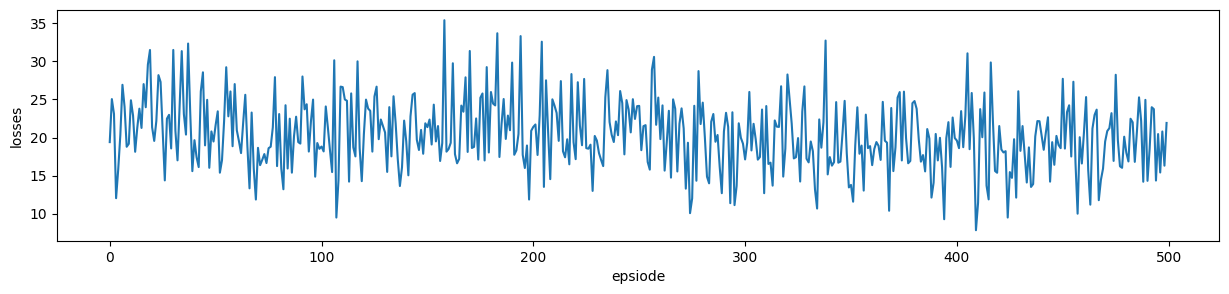

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,3))
plt.plot(losses)
plt.xlabel('epsiode')
plt.ylabel('losses')
plt.title('')
plt.show()

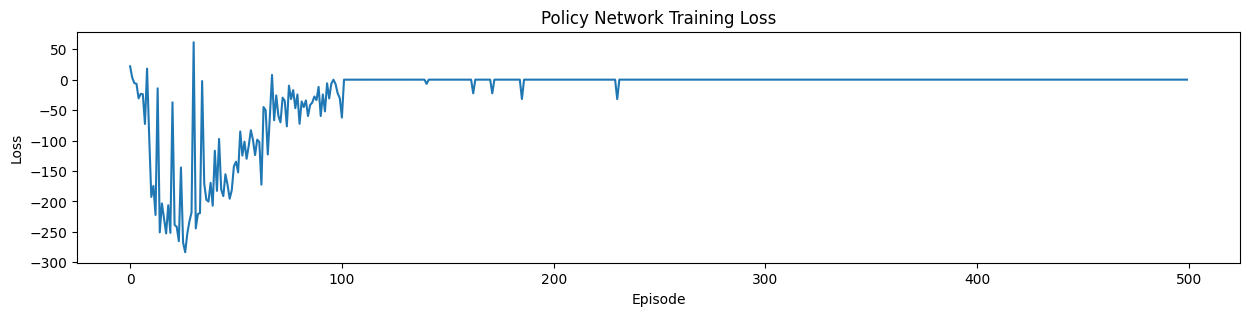

In [28]:
plt.figure(figsize = (15,3))
plt.plot(episode_list,loss_list)
plt.title('Policy Network Training Loss')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.show()
